# CPU Preprocessing

In [11]:
from pandas import DataFrame
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot

set_option('display.max_columns', 50)

In [12]:
df = read_csv('cpu.csv', header=0)
df.head()

,@timestamp,system.cpu.user.pct,system.cpu.system.pct,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.total.pct
0,"October 2nd 2018, 00:00:07.546",23.64%,5.01%,367.15%,3.1%,1.1%,32.85%
1,"October 2nd 2018, 00:00:17.546",21.02%,5.35%,372.42%,0.3%,0.91%,27.58%
2,"October 2nd 2018, 00:00:27.546",24.79%,6.65%,366.65%,0.81%,1.11%,33.35%
3,"October 2nd 2018, 00:00:37.546",24.13%,5.68%,367.39%,1.6%,1.2%,32.61%
4,"October 2nd 2018, 00:00:45.221",23.9%,6.1%,367.8%,1.07%,1.12%,32.2%


## Remove Presentage Marks

In [13]:
for i in range(df.shape[1]):
    selected_col = df.iloc[:, i]
    col_type = type(selected_col[0])
    
    if(col_type == str):
        if(selected_col.iloc[0].endswith('%')):
            df.iloc[:, i] = df.iloc[:, i].str.rstrip('%').astype('float') / 100.0

df.head()

,@timestamp,system.cpu.user.pct,system.cpu.system.pct,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.total.pct
0,"October 2nd 2018, 00:00:07.546",0.2364,0.0501,3.6715,0.0310,0.0110,0.3285
1,"October 2nd 2018, 00:00:17.546",0.2102,0.0535,3.7242,0.0030,0.0091,0.2758
2,"October 2nd 2018, 00:00:27.546",0.2479,0.0665,3.6665,0.0081,0.0111,0.3335
3,"October 2nd 2018, 00:00:37.546",0.2413,0.0568,3.6739,0.0160,0.0120,0.3261
4,"October 2nd 2018, 00:00:45.221",0.2390,0.0610,3.6780,0.0107,0.0112,0.3220


In [14]:
df.to_csv("cpu-cleaned.csv");

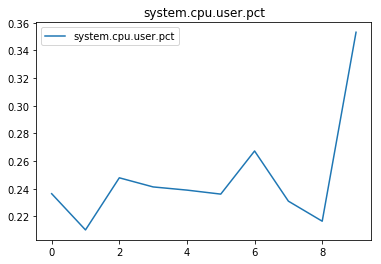

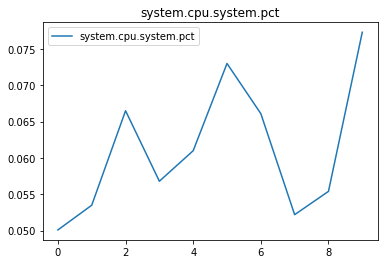

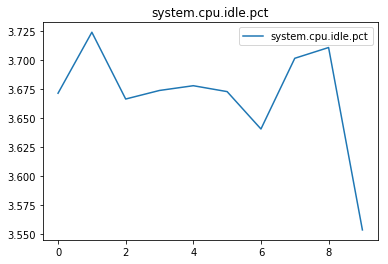

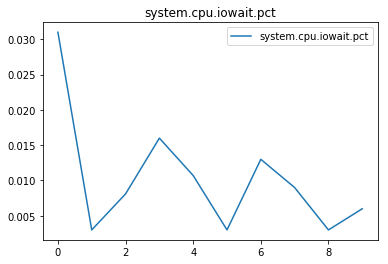

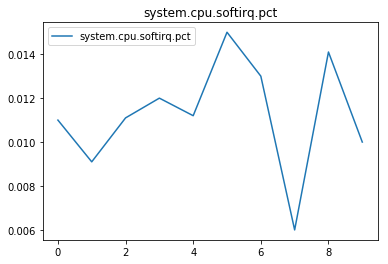

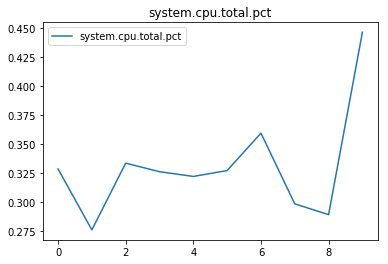

In [15]:
for i in range(1, df.shape[1]):
    pyplot.plot(df[df.columns[i]], label=df.columns[i])
    pyplot.legend()
    pyplot.title(df.columns[i])
    pyplot.show()